### Load and Preview Relevant Columns

In [1]:
import pandas as pd

# Load data
df = pd.read_csv("../data/raw/healthcare_analytics_dataset.csv")

# Preview
df[["covid_test_date", "covid_test_result"]].head()

,covid_test_date,covid_test_result
0,2025-07-22,Negative
1,2025-07-07,Negative
2,2025-07-07,Negative
3,2025-06-28,Negative
4,2025-06-04,Negative


### Clean Date & Result Columns

In [2]:
# Convert test date to datetime
df["covid_test_date"] = pd.to_datetime(df["covid_test_date"], errors="coerce")

# Drop null dates
df = df.dropna(subset=["covid_test_date"])

# Extract year-month for trend analysis
df["month"] = df["covid_test_date"].dt.to_period("M").astype(str)

# Normalize result column (e.g., fix case)
df["covid_test_result"] = df["covid_test_result"].str.strip().str.title()

### Monthly Total Test Counts

In [3]:
# Count all tests by month
monthly_tests = df.groupby("month").size().reset_index(name="total_tests")
monthly_tests = monthly_tests.sort_values("month")

### Positive/Negative Trend Line

In [4]:
# Count test results by month
monthly_results = (
    df.groupby(["month", "covid_test_result"]).size().reset_index(name="count")
)

# Pivot to columns: Positive, Negative
monthly_pivot = monthly_results.pivot(
    index="month", columns="covid_test_result", values="count"
).fillna(0)
monthly_pivot = monthly_pivot.reset_index().sort_values("month")

# Calculate positivity rate
monthly_pivot["positivity_rate"] = monthly_pivot["Positive"] / (
    monthly_pivot["Positive"] + monthly_pivot["Negative"]
)

### Plot Test Result Trends

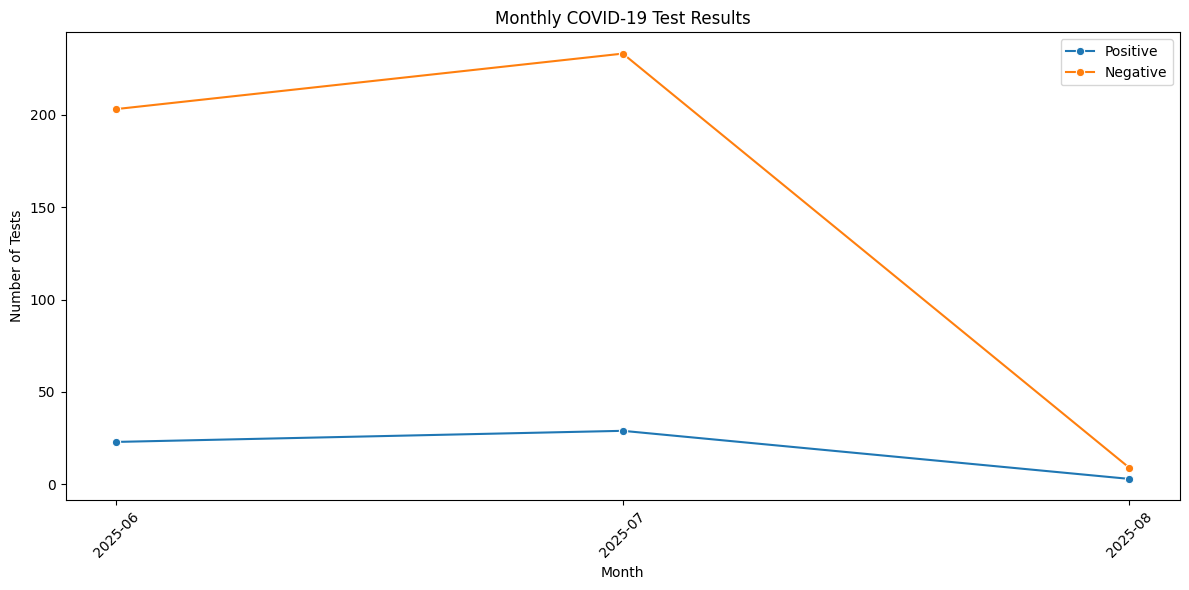

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../visuals/plots", exist_ok=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pivot, x="month", y="Positive", label="Positive", marker="o")
sns.lineplot(data=monthly_pivot, x="month", y="Negative", label="Negative", marker="o")
plt.title("Monthly COVID-19 Test Results")
plt.xlabel("Month")
plt.ylabel("Number of Tests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/plots/covid_test_results_trend.png")
plt.show()

### Plot Positivity Rate

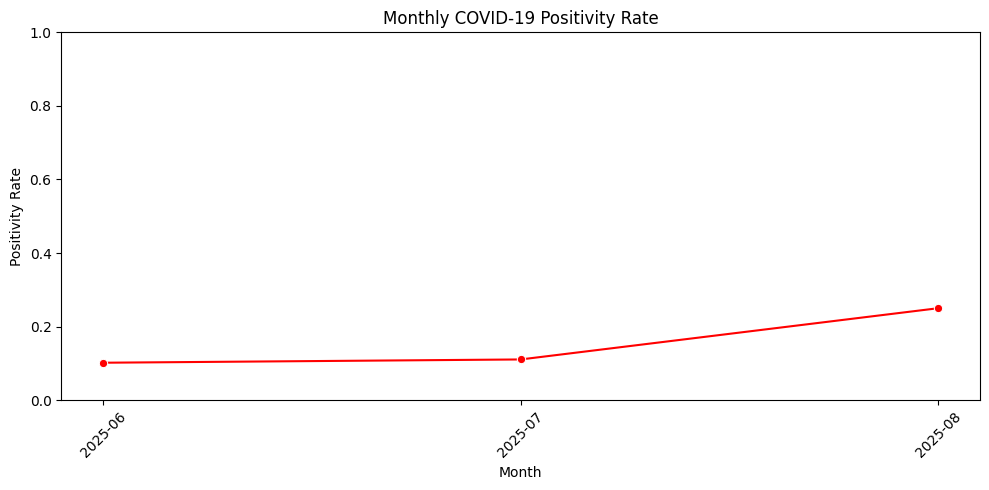

In [6]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=monthly_pivot, x="month", y="positivity_rate", marker="o", color="red"
)
plt.title("Monthly COVID-19 Positivity Rate")
plt.xlabel("Month")
plt.ylabel("Positivity Rate")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/plots/covid_positivity_rate_trend.png")
plt.show()

### Export Data for Power BI

In [7]:
# Export
monthly_pivot.to_csv("../data/processed/cleaned/covid_test_summary.csv", index=False)
print("✅ COVID-19 test trend data saved to /data/processed/cleaned/covid_test_summary.csv")

✅ COVID-19 test trend data saved to /data/processed/cleaned/covid_test_summary.csv
